In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [20]:
# 데이터 가져오기
fish_df = pd.read_csv('./fish_data.csv', index_col=0)
fish_data = fish_df[['length', 'weight']]
fish_target = fish_df['type']
# default 25% 비율로 테스트 데이터를 분리시켜준다.
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

# 0의 비율이 적은 편향이 일어난다.
print(np.array(test_target))

# stratify 매개변수에 타깃 데이터를 전달하면, 범주 비율에 맞게 데이터를 나눈다.
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target,stratify=fish_target, random_state=42)
print(np.array(test_target))

[1 0 0 0 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 1 1 1 1 1 1 1]


In [25]:
# 모델 훈련 및 검정
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
print(kn.score(train_input, train_target))
print(kn.score(test_input, test_target))

1.0
1.0


In [28]:
# 도미 데이터 테스트. 빙어(0)로 나타남
kn.predict([[25, 150]])

c:\Users\fdsaf\Desktop\개인학습\ML_study\ML\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

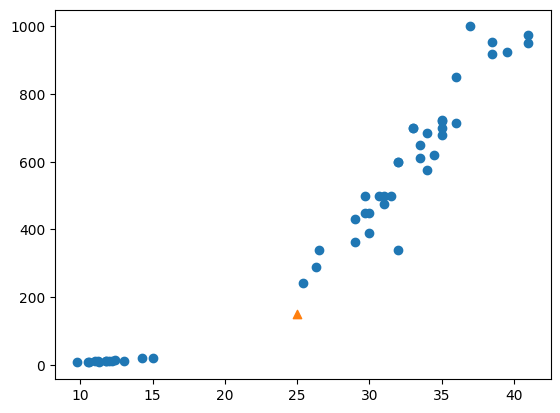

In [29]:
# 산점도로 파악
plt.scatter(fish_data['length'], fish_data['weight'])
plt.scatter(25, 150, marker='^')

[25, 150] 샘플은 다른 도미 데이터와의 거리가 더 가깝다.

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
[[21 33 19 30  1]]


c:\Users\fdsaf\Desktop\개인학습\ML_study\ML\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


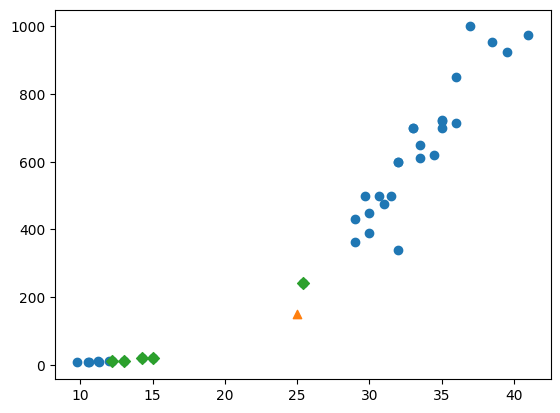

In [40]:
# 가장 거리가 가까운 5개 이웃 출력
distances, indexes = kn.kneighbors([[25, 150]])
print(distances)
print(indexes)

# 가장 거리가 가까운 5개 이웃 시각화
plt.scatter(train_input['length'], train_input['weight'])
plt.scatter(25, 150, marker='^')
# 다이아몬드 마커로 표시
plt.scatter(train_input.iloc[indexes[0],0], train_input.iloc[indexes[0], 1], marker='D')

도미와 더 가까워 보이지만, 알고리즘 상으로는 가장 가까운 데이터중 4개가 빙어이다.

(0.0, 1000.0)

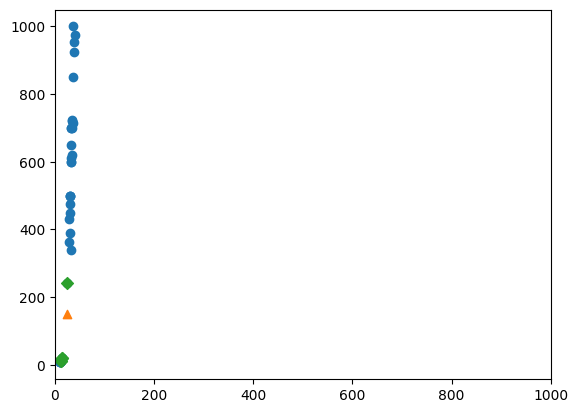

In [42]:
# 길이의 스케일을 늘려서 시각화
plt.scatter(train_input['length'], train_input['weight'])
plt.scatter(25, 150, marker='^')
# 다이아몬드 마커로 표시
plt.scatter(train_input.iloc[indexes[0],0], train_input.iloc[indexes[0], 1], marker='D')
plt.xlim((0,1000))

- 차트를 통해서 보면 오로지 무게만 중요한 factor 인것을 알 수 있다.
- length의 스케일과 weight의 스케일이 차이가 크다. 그래서 weight 에만 영향을 크게 받는다
- 이런 거리기반 알고리즘을 다루는 모델일때, 데이터 전처리가 필요하다.

In [61]:
from scipy import stats
# z score 기반으로 표준화
fish_data['SL'] = stats.zscore(fish_data['length'])
fish_data['SW'] = stats.zscore(fish_data['weight'])
mean = fish_data[['length','weight']].mean()
std = fish_data[['length', 'weight']].std()
fish_data

,length,weight,SL,SW
0,25.4,242.0,-0.163261,-0.623504
1,26.3,290.0,-0.074484,-0.475710
2,26.5,340.0,-0.054756,-0.321759
3,29.0,363.0,0.191847,-0.250941
4,29.0,430.0,0.191847,-0.044646
5,29.7,450.0,0.260896,0.016935
6,29.7,500.0,0.260896,0.170886
7,30.0,390.0,0.290488,-0.167807
8,30.0,450.0,0.290488,0.016935
9,30.7,500.0,0.359537,0.170886


In [78]:
# 훈련 데이터와 검정 데이터 표준화
scaled_train_input = (train_input-mean)/std
scaled_test_input = (test_input-mean)/std

C:\Users\fdsaf\AppData\Local\Temp\ipykernel_8212\3859476.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(sample_data[0], sample_data[1], marker='*')


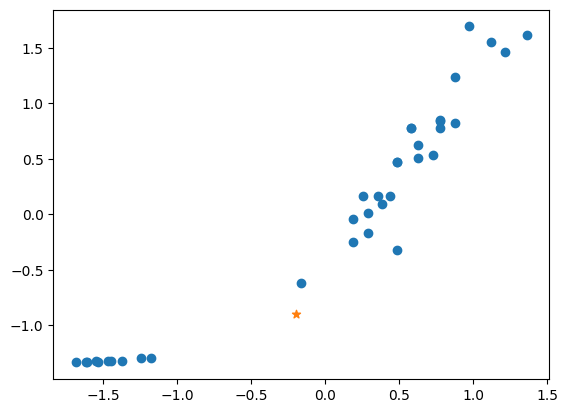

In [77]:
# 산점도로 확인
sample_data = ([25, 150] - mean)/std
plt.scatter(scaled_train_input['length'], scaled_train_input['weight'])
plt.scatter(sample_data[0], sample_data[1], marker='*')


비슷한 구성의 차트 이지만 길이의 스케일이 달라졌다.

In [79]:
# 모델 재훈련
kn.fit(scaled_train_input, train_target)
kn.score(scaled_test_input, test_target)

1.0

In [86]:
kn.predict([sample_data])

c:\Users\fdsaf\Desktop\개인학습\ML_study\ML\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

표준화를 하면 데이터가 잘 반환된다.

c:\Users\fdsaf\Desktop\개인학습\ML_study\ML\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\fdsaf\AppData\Local\Temp\ipykernel_8212\3250751031.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(sample_data[0], sample_data[1], marker='*')


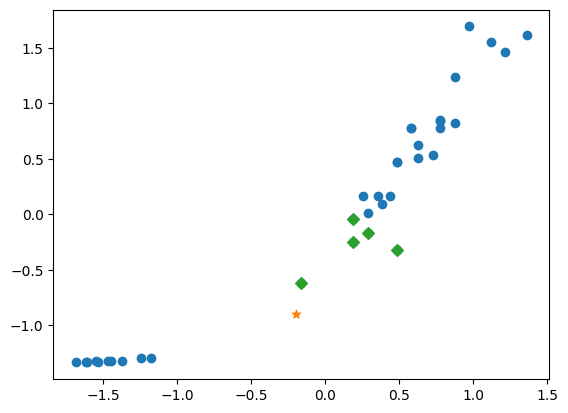

In [102]:
# 표준화 되었을때 최근접 이웃 확인
distances, indexes = kn.kneighbors([sample_data])
plt.scatter(scaled_train_input['length'], scaled_train_input['weight'])
plt.scatter(sample_data[0], sample_data[1], marker='*')
plt.scatter(scaled_train_input.iloc[indexes[0], 0], scaled_train_input.iloc[indexes[0],1], marker='D')